<a href="https://colab.research.google.com/github/Sourabhpatel1/CapstoneProject-LinearRegression/blob/main/Capstone_Project_II%2C_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

  <h1>
    <b>Seoul Bike Sharing Demand Prediction</b>
  </h1>
  ---------------------------------------------------------------------------------------------------------------------
  <h2>AlmaBetter Capstone Project - II, Regression</h2>

</center>

<blockquote><h3><b>The Problem Statement</b></h3>
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
<br>
<br>
The challnge/task for this project is to estimate the number of bikes needed at a particular hour on a given day of the year so that the number of bikes available for rental is as close to the the actual demand as possible. 
</blockquote>


<blockquote><h3><b>The Dataset</b></h3>
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.<br><br>
<h4>Attribute Information:<h4>
<ul>
  <li>Date : Date, Month and Year</li>
  <li>Rented Bike count - Count of bikes rented at each hour</li>
  <li>Hour - Hour of he day between 0-23</li>
  <li>Temperature - Temperature at the particular hour in ° Celsius</li>
  <li>Humidity - Humidity at a given Hour in %</li>
  <li>Windspeed - Wind speed at the given Hour in m/s</li>
  <li>Visibility - Visisbility at the given Hour</li>
  <li>Dew point temperature - Dew Point Temprature in °Celsius</li>
  <li>Solar radiation - Amount of Solar radiation at the given hour MJ/m2</li>
  <li>Rainfall - Rainfall at the given hour in mm</li>
  <li>Snowfall - Snowfall at the given hour in cm</li>
  <li>Seasons - Winter, Spring, Summer, Autumn</li>
  <li>Holiday - Holiday or No holiday</li>
  <li>Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)</li>
</ul>
<h3>The data containes the hourly weather information such as Temprature, Humidity, Windspeed, Visibility, Rainfall, Snowfall e.t.c for two years along with the Information about Holiday, Season and Rented Bike Count on a particular hour.</h3>
</blockquote>



<h2><b>
1. Importing required libraries and setting parameters for the visualizations <br>
2. Mounting the google drive and loading the data from google drive
</b></h1>

In [1]:
# Importing required and used libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Filtering depracated or copy/slice warnings

import warnings
warnings.simplefilter("ignore")

In [3]:
# Setting the plotting parameters for mtploptlib and seaborn

plt.rcParams["figure.figsize"] = (12,7)

In [4]:
# Mounting goodle drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Loading the dataset
# The feature Date is in string format in the dataset so parse_dates argument is passed to parse column as datetime object only

data = pd.read_csv('/content/drive/MyDrive/Capstone Project - 2/SeoulBikeData.csv',encoding='unicode_escape', parse_dates=["Date"])

<blockquote><h1><b>Inspecting the Dataset to check for missing values and get a general sense of the features such as if a feature is numerical or categorical and if a numerical feature is discrete or continuous and their important statistics such as mean, median and unique values.</b></h1></blockquote>

In [6]:
# Checking the shape of the data to see how many rows and columns the dataset has

print(f"dataset has {data.shape[0]} rows and {data.shape[1]} columns")


dataset has 8760 rows and 14 columns


In [7]:
# Checking head and tail od the dataset to get a brief overview of the dataset
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# Checking for missing values in the dataset and checking the dtypes of the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

<b><h1>Types of features</h1>
<hr>
<h3>There are no missing values in the entire dataset.</h3>
<ol>
  <li>The Date column is in Datetime format.</li>
  <li>The Rented Bike Count column is our target variable.</li>
  <li>Apart from Rented Bike Count there are 9 numerical columns out of which 6 are floating point types and 3 are integers.</li>
  <li>Hour is the time of day given on a 24 hour scale from 0-23 so it is a ctegorical or discrete variable/feature.</li>
  <li>Rest of the numerical columns as given in the dataset are continuous in nature.</li>
  <li>There are 3 categorical columns in the dataset i.e. Seasons, Holiday and Functioning Day.</li>
</ol>
</b>

In [10]:
# Lets look at the quick summary of the numerical columns in the dataset

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Checking the description of categorical features

data.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Summer,No Holiday,Yes
freq,2208,8328,8465


<h1><b>Observations<b></h1>
<hr>
<ol>
  <li>The minimum value of rented bike count is 0 suggesting that there were days when the bike rental services was not available. The dataset's description says that when functioning day is no the bikes are not available for rent.</li>
  <li>Because we are only concerened with the prediction of demand when the service is functional we will drop the rows where Rented Bike Count is 0 due to non functioning day.</li>
  <li>Looking at the range of rented bike counts it seems that there are a few outliers in the dataset which needs to be examined to make a better dataset for modeling.</li>
  <li>The other columns also seem to have a few outliers so outlier examination of entire dataset is warranted.</li>
</ol>

In [12]:
# functioning day specifies whether bikes were available for rent on that day or not.
# We are not interedted in rows where rented bike count was 0 hence removing those rows

data = data[data["Functioning Day"] != "No"]
data = data.drop("Functioning Day", axis=1)
data.reset_index(inplace=True, drop=True)
# Checking Data Shape Again

print(f"After removing the rows with 0 Bike rentals i.e {8760-data.shape[0]} rows due to non functioning days\nwe are left with {data.shape[0]} rows")

After removing the rows with 0 Bike rentals i.e 295 rows due to non functioning days
we are left with 8465 rows


In [13]:
# we should divide the dataset into numerical and categorical columns so that it is easier for us to nalayse those separately.
# Making new dataframes of categorical and numerial columns for better EDA and analysis. 
# Hour is a discrete variable so it should be analysed as a categorical variable
# Date is also treated as not a numerical column but should be manipulated to be useful in our model.

numerical_data = data[[col for col in data.columns if data[col].dtype != 'object' and data[col].dtype != 'datetime64[ns]' and col != 'Hour']]
categorical_data = data[[col for col in data.columns if col not in numerical_data.columns]]

In [14]:
# Checking head of numerical data
numerical_data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [15]:
# Checking head of categorical data
categorical_data.head()

,Date,Hour,Seasons,Holiday
0,2017-01-12,0,Winter,No Holiday
1,2017-01-12,1,Winter,No Holiday
2,2017-01-12,2,Winter,No Holiday
3,2017-01-12,3,Winter,No Holiday
4,2017-01-12,4,Winter,No Holiday


In [16]:
# Checking out the statistics of numerical features

numerical_data.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


It rained on 6.1% of hours out of total 8465 hours


------------------------------------------------------------------------------------------------


Distribution of Rainfall in the Dataset




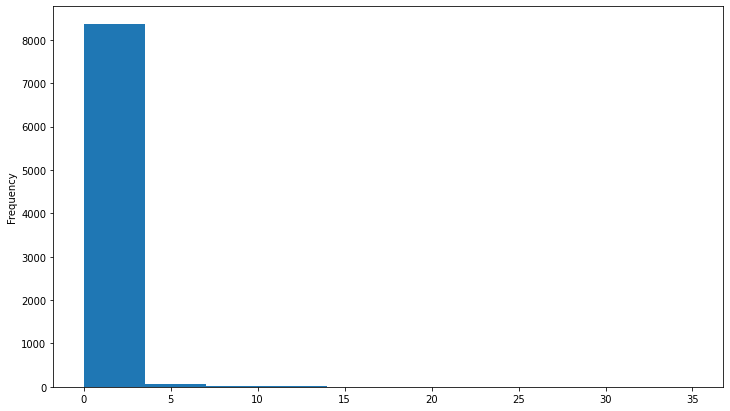

In [17]:
#Rainfall and Snowfall are very sparse in the dataset. Checking their distribution to see if some kind of transformation is needed
# Checking the percentage of number of hours it rained out of total hours

p_rain_hours = numerical_data.loc[numerical_data["Rainfall(mm)"] > 0].shape[0] / len(numerical_data) * 100

print(f"It rained on {round(p_rain_hours,2)}% of hours out of total {len(numerical_data)} hours" "\n\n")
print("--" * 48 + "\n\n")
print("Distribution of Rainfall in the Dataset" + "\n\n")
numerical_data["Rainfall(mm)"].plot(kind='hist');

It Snowed on 5.23% of hours out of total 8465 hours


------------------------------------------------------------------------------------------------


Distribution of Snowfall in the Dataset




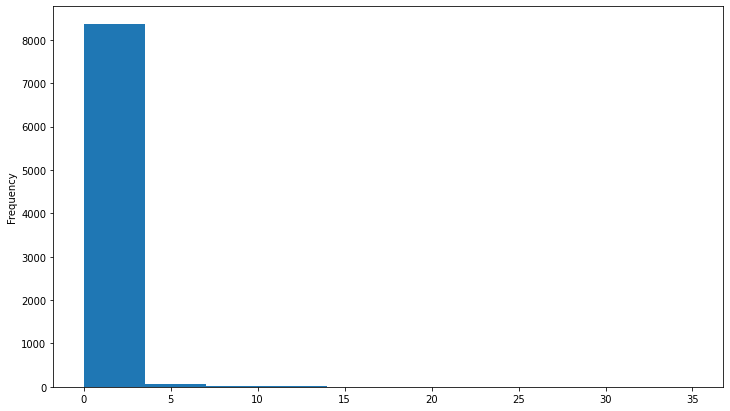

In [18]:
# Checking the percentage of number of hours it snowed out of total hours

p_snow_hours = numerical_data.loc[numerical_data["Snowfall (cm)"] > 0].shape[0] / len(numerical_data) * 100

print(f"It Snowed on {round(p_snow_hours,2)}% of hours out of total {len(numerical_data)} hours" "\n\n")
print("--" * 48 + "\n\n")
print("Distribution of Snowfall in the Dataset" + "\n\n")
numerical_data["Rainfall(mm)"].plot(kind='hist');

<h1>Observations on Snowfall and Rainfall</h1>
<ol>
  <li>The distribution of Rainfall and Snowfall is very concentrated around 0.</li>
  <li>The Rainfall hours and Snowfall hours in the dataset is less than 7% in the whole dataset.</li>
  <li>On more than 93% of hours it did not rain.</li>
  <li>It is therefore better to treat the Rainfall and Snowfall as categorical features.</li>
  <li>The data will be tranformed to categorical columns by binary encoding making it 1 for hours it rained or snowed else 0 for others.</li>
  <li>The features will also be removed from the numerical features columns and will be added to categorical features.</li>
</ol>

In [19]:
# Removing Rainfall and Snowfall from numerical_data and ading it to the categorical columns.
# Adding Rainfall and Snowfall to the categorical features.

categorical_data["Rainfall(mm)"] = numerical_data["Rainfall(mm)"]
categorical_data["Snowfall (cm)"] = numerical_data["Snowfall (cm)"]

# Removing Snowfall and Rainfall from numerical features.

numerical_data.drop(columns=["Rainfall(mm)", "Snowfall (cm)"], axis=1, inplace=True)

# Binary Encoding Rainfall and Snowfall in original Dataset and in Categorical features

data["Rainfall(mm)"] = data["Rainfall(mm)"].apply(lambda x : 1 if x > 0 else 0)
data["Snowfall (cm)"] = data["Snowfall (cm)"].apply(lambda x : 1 if x > 0 else 0 )

# Encoding in categorical features

categorical_data["Rainfall(mm)"] = categorical_data["Rainfall(mm)"].apply(lambda x : 1 if x > 0 else 0)
categorical_data["Snowfall (cm)"] = categorical_data["Snowfall (cm)"].apply(lambda x : 1 if x > 0 else 0 )


In [20]:
# Checking the encoded columns

categorical_data[["Rainfall(mm)"]].value_counts()

Rainfall(mm)
0               7949
1                516
dtype: int64

In [21]:
categorical_data[["Snowfall (cm)"]].value_counts()

Snowfall (cm)
0                8022
1                 443
dtype: int64

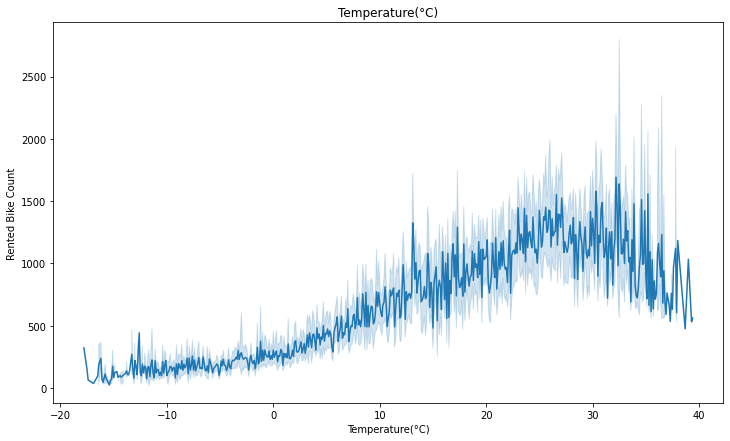

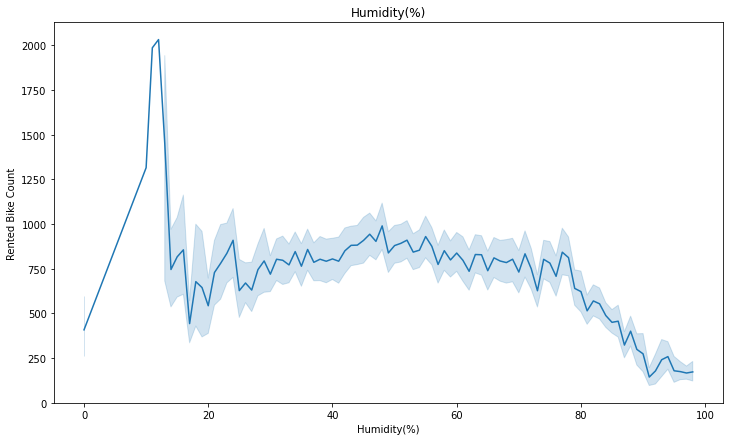

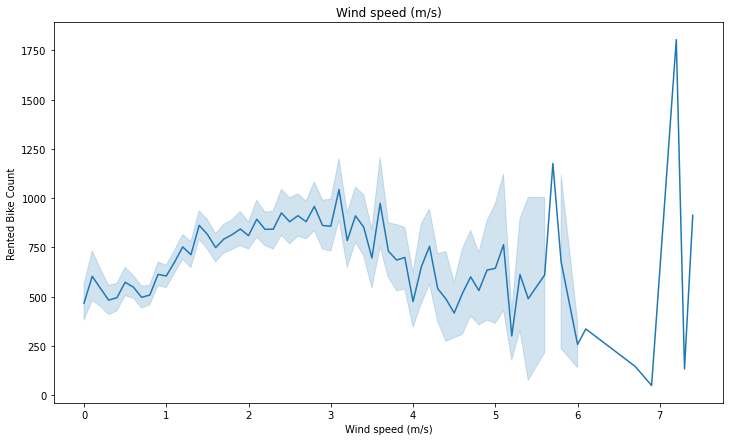

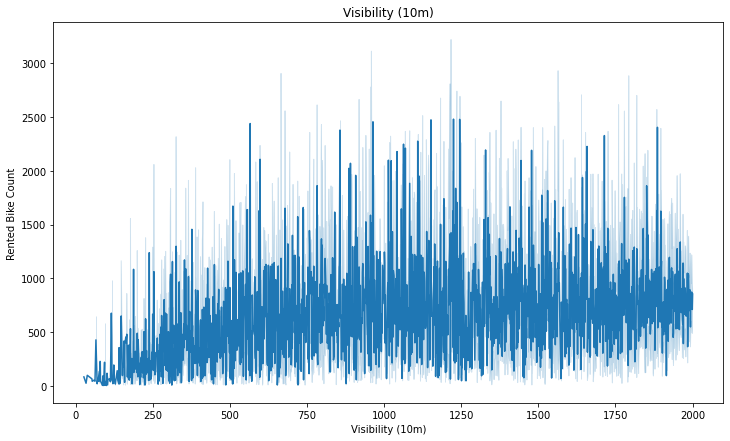

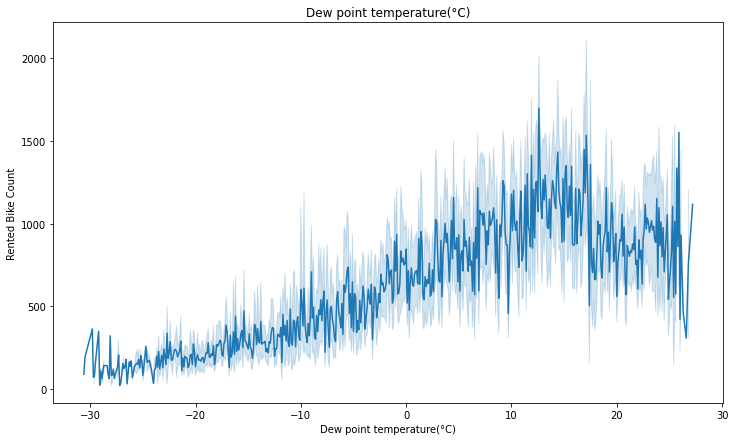

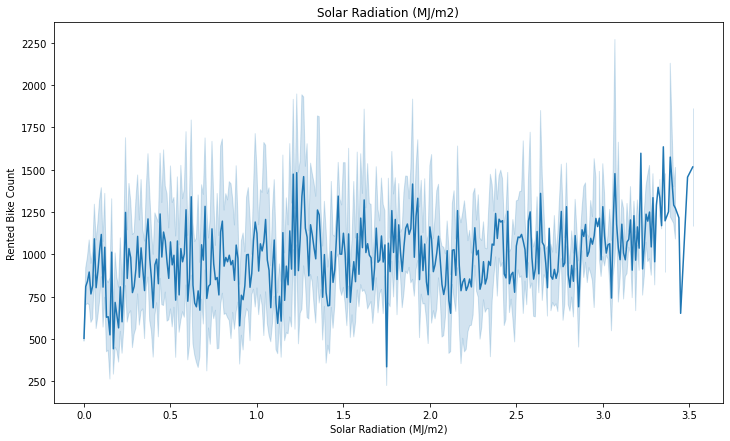

In [22]:
# Checking relationship of numerical features with the Rented Bike Count

for col in [col for col in numerical_data.columns if col != "Rented Bike Count"]:
  fig = plt.figure()
  ax = fig.gca()
  sns.lineplot(numerical_data[col], numerical_data["Rented Bike Count"])
  ax.set_title(col)

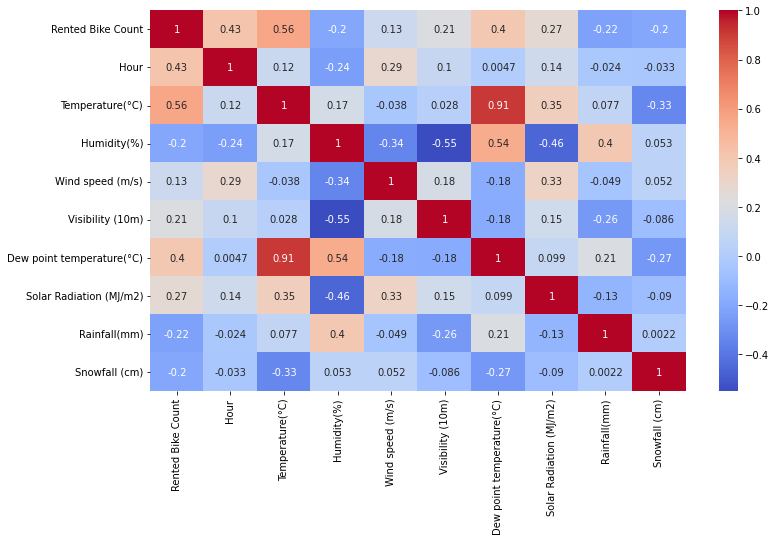

In [23]:
# Checking correlation between the numerical features

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<h1><b>Collinearity between Target variable and Features and Among features themselves</b></h1>
<hr>
<ol>
  <li>All numerical features except windspeed seem to be linearly correlated with the Rented Bike Count.</li>
  <li>When humidity is between 0 - 10 the Rented Bike Count seems to increase but after that point it is mostly negetively correlated with the target feature.</li>
  <li>Dew Point Temprature and Temprature are almost perfectly correlated.</li>
  <li>Dew point temprature will be dropped because it itself is dependent on Temprature thus it can be explained by Temprature only.</li>
</ol>

In [24]:
# Dropping dew point temprature from the dataset

numerical_data.drop("Dew point temperature(°C)", axis=1, inplace=True)
data.drop("Dew point temperature(°C)", axis=1, inplace=True)

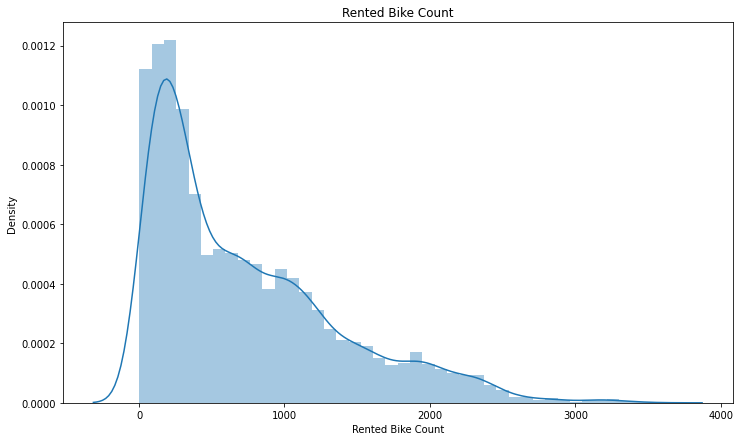

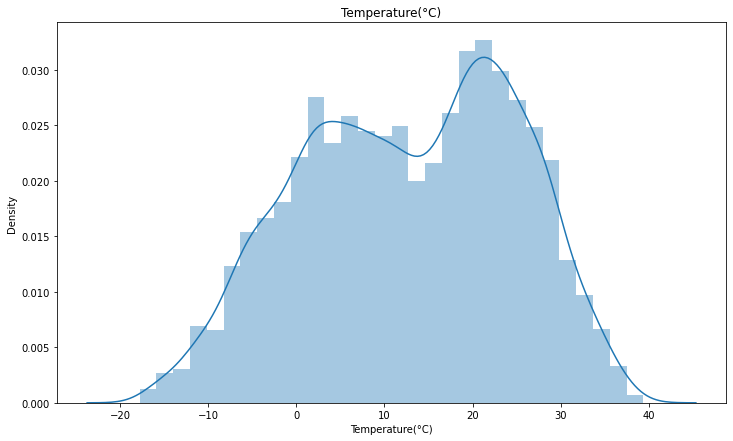

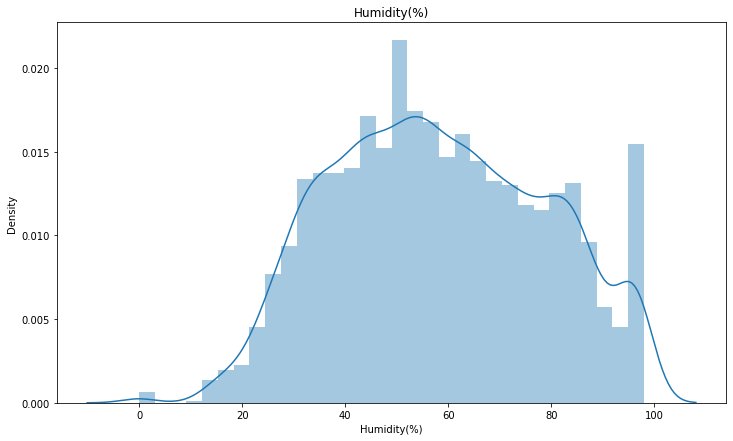

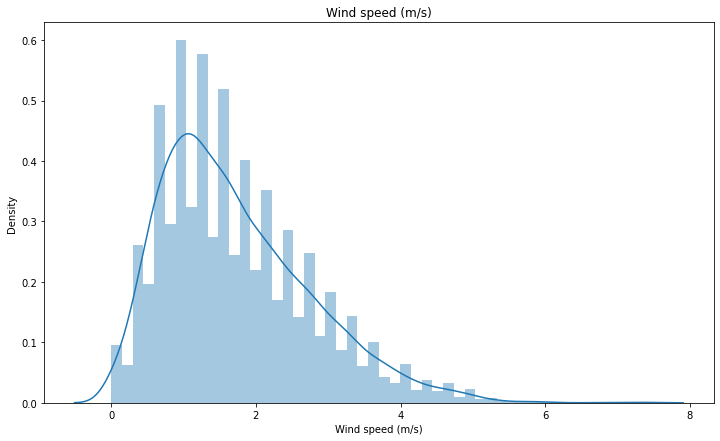

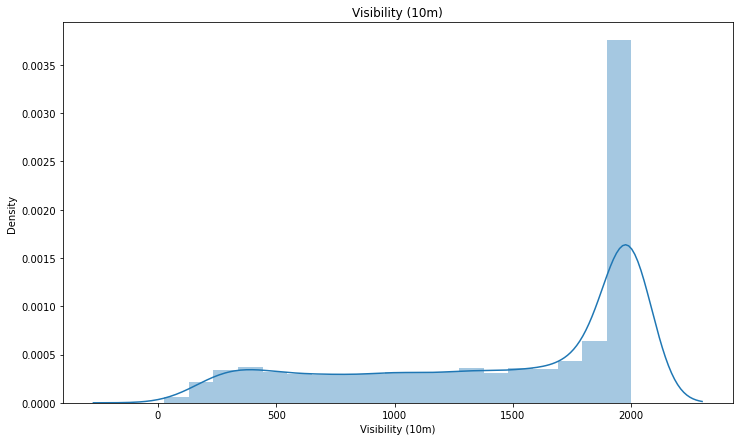

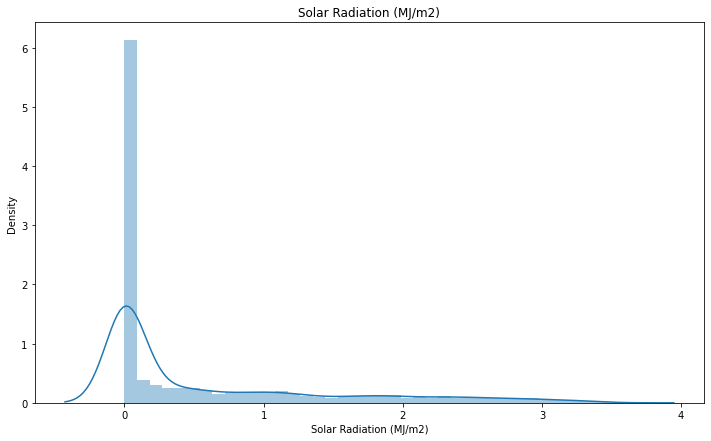

In [25]:
# Checking the distribution of the numerical features in the dataset

for col in numerical_data.columns:
  fig = plt.figure()
  ax = fig.gca()
  sns.distplot(numerical_data[col])
  ax.set_title(col)

<h1><b>Distribution of Numerical Features in the dataset.</b></h1>
<hr>
<ol>
  <li>All the features except Visibility and Solar Radiation are normally distributed.</li>
  <li>Columns Rented Bike Count (Target Variable) and Wind Speed are positively skewed in their distributions.</li>
  <li>Visibility and Solar Radiation are not normally distributed and are heavily concentrated at one particular value.</li>
  <li> We'll leave the visibility and Solar Radiation as it is for now</li>
</ol>

In [26]:
# Checking the Original DataFrame
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0,0,Winter,No Holiday
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0,0,Winter,No Holiday
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0,0,Winter,No Holiday
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0,0,Winter,No Holiday
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0,0,Winter,No Holiday


In [27]:
#checking numerical and categorical datasets

numerical_data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2)
0,254,-5.2,37,2.2,2000,0.0
1,204,-5.5,38,0.8,2000,0.0
2,173,-6.0,39,1.0,2000,0.0
3,107,-6.2,40,0.9,2000,0.0
4,78,-6.0,36,2.3,2000,0.0


In [28]:
categorical_data.head()

,Date,Hour,Seasons,Holiday,Rainfall(mm),Snowfall (cm)
0,2017-01-12,0,Winter,No Holiday,0,0
1,2017-01-12,1,Winter,No Holiday,0,0
2,2017-01-12,2,Winter,No Holiday,0,0
3,2017-01-12,3,Winter,No Holiday,0,0
4,2017-01-12,4,Winter,No Holiday,0,0


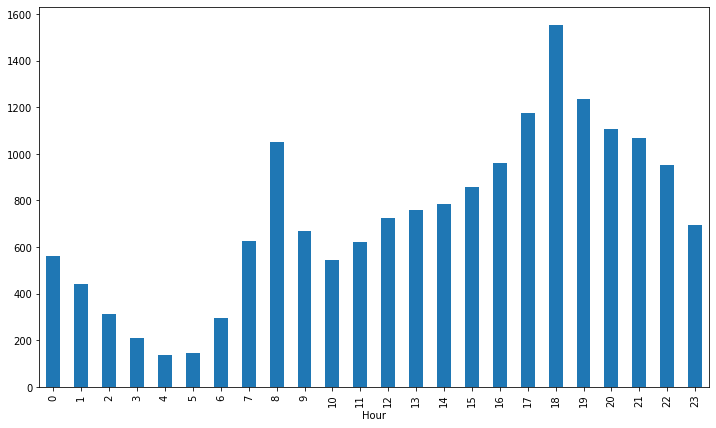

In [29]:
# Checking mean bike rentals by the hour.
data.groupby("Hour", sort=True)["Rented Bike Count"].mean().plot(kind='bar')

<ol>
  <li>The number of rented bike count starts increasing around 5 A.M. and has a small peak at around 8 A.M. after which it declines gently till about 10 A.M.</li>
  <li> Then from 10 A.M. onwards the Rented Bike Count increases till about 6 P.M. where it reaches peak and then declines gradually till 4 A.M. in the morning.
</ol>

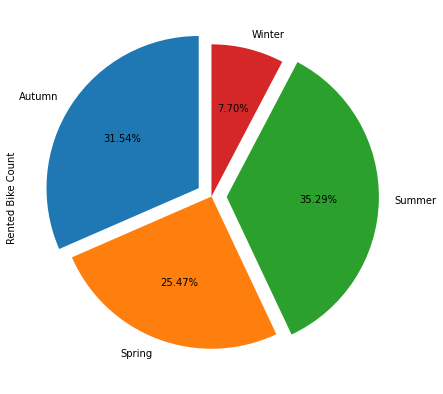

In [30]:
# Examining Seasons w.r.t Rented Bike Count
data.groupby("Seasons")["Rented Bike Count"].mean().plot(kind='pie', startangle=90, autopct="%.2f%%", explode=[0.1,0,0.1,0]);

<blockquote><br>Rented Bike count is Higher during Summer and Autumn seasons and is somewhat lower for Spring season and Lowest in the winter season.<br></blockquote>

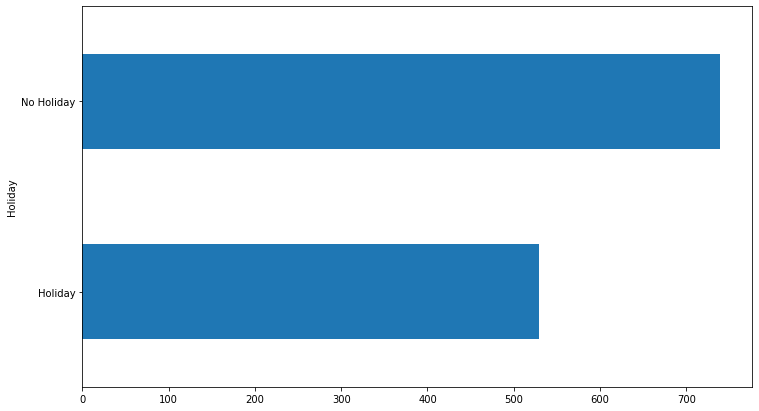

In [31]:
# Examining Holiday w.r.t Rented Bike Count
data.groupby("Holiday")["Rented Bike Count"].mean().plot(kind='barh')

<blockquote><br>The Rented Bike Count is high for when it is a working day<br></blockquote>

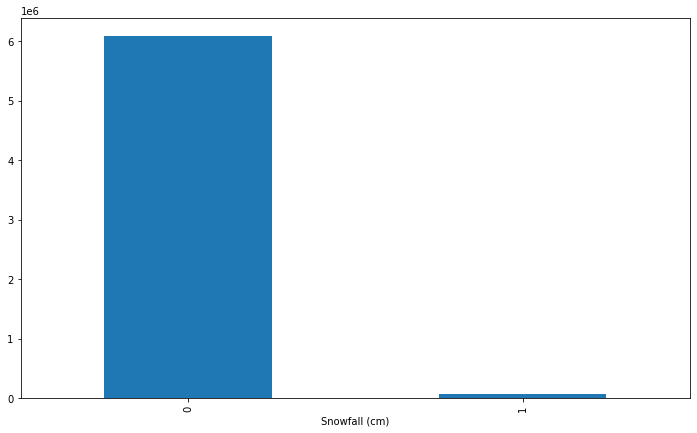

In [32]:
# Examining Snowfall and Rainfall w.r.t Rented Bike Count

data.groupby("Snowfall (cm)")["Rented Bike Count"].sum().plot(kind='bar')

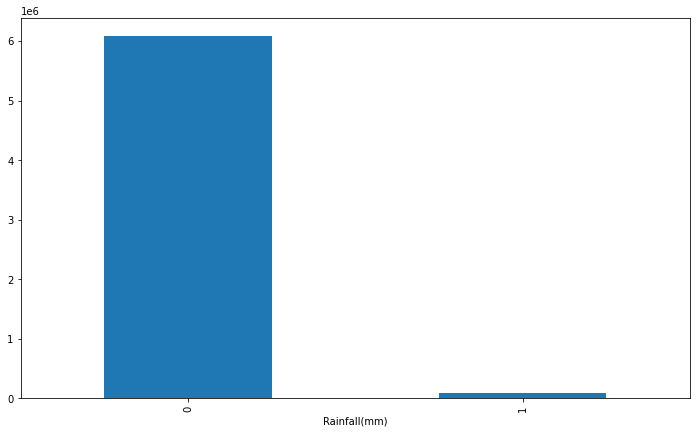

In [33]:
data.groupby("Rainfall(mm)")["Rented Bike Count"].sum().plot(kind='bar')

<blockquote>The amount of Rented Bike Count is drastically lower when it was raining or snowing</blockquote>

<h1><b>Categorical Features</b></h1>
<hr>
<blockquote>Analysis of Categorical Features</blockquote>
<ol>
  <li>The date column is not very useful as it is right now. The Month and Day of the week can be extracted as a ordinal number from the date column to make it better suited for our Regression Model.</li>
  <li>There are four Seasons i.e. Summer, Winter, Spring and Monsoon in the dataset. We'll encode them ordinally.</li>
  <li>Holiday has only two unique values so a binary encoding is warranted.</li>
  <li>Rainfall and Snowfall are already binary encoded.</li>
  <li>Hour is already appropraitely represented as values between 0 and 1</li>
</ol>

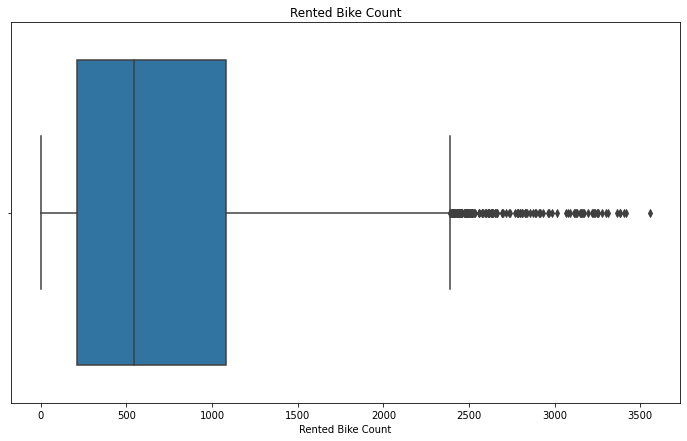

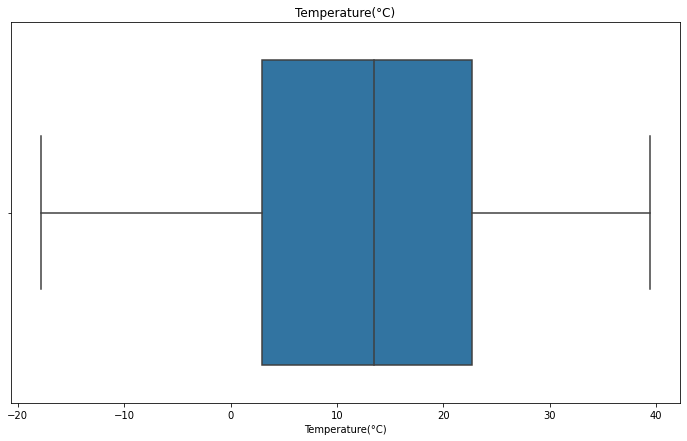

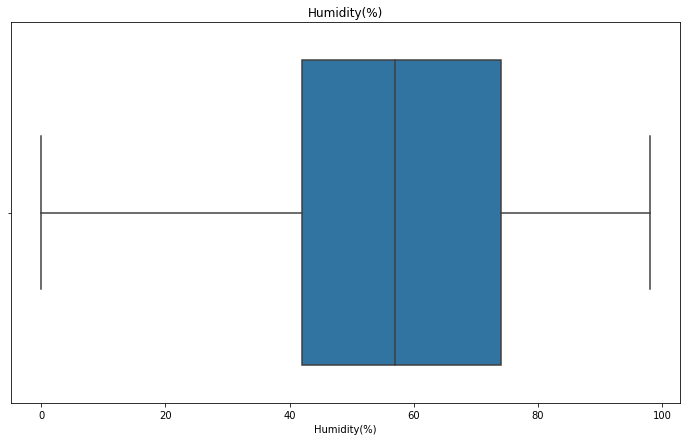

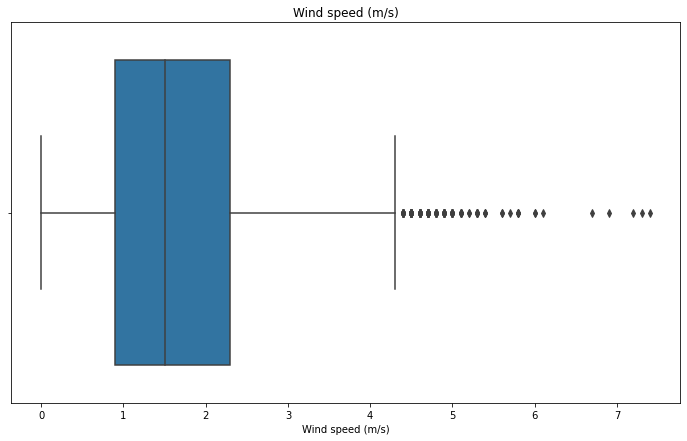

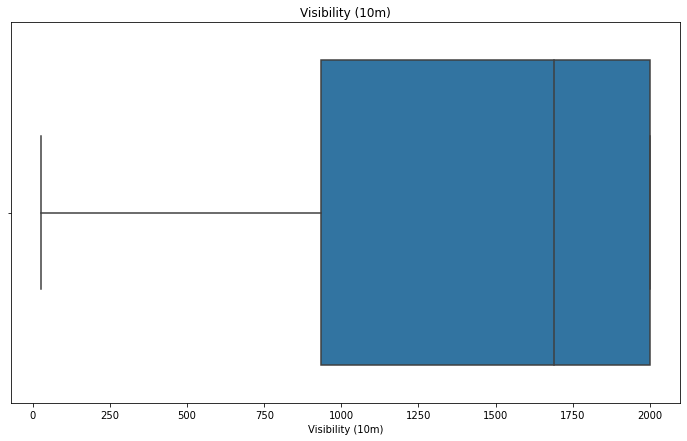

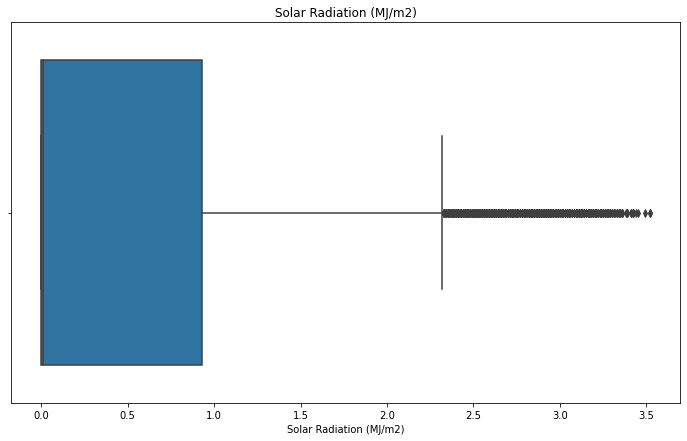

In [34]:
# Lets look at boxplots of each numerical feature to check for outliers
# Looping over each column to make a boxplot

for col in numerical_data.columns:
  fig = plt.figure()
  ax = fig.gca()
  sns.boxplot(x=numerical_data[col])
  ax.set_title(col)




<center><h1><b>Outliers</b></h1></center>
<hr>
<h3><b>From the above boxplots we can see that the following columns have outliers :</b></h3>
<ol>
  <li>Rented Bike Count</li>
  <li>Wind Speed</li>
  <li>Solar Radiation</li>
</ol>
<h3><b>Outliers only from the target variable will be removed</b></h3>


In [35]:
# Defining upper Bound
IQR = np.quantile(data["Rented Bike Count"], 0.75) - np.quantile(data["Rented Bike Count"], 0.25)
upper_bound = np.quantile(data["Rented Bike Count"], 0.75) + (1.5 * IQR)
print(upper_bound)

2389.0


In [36]:
# Looking at rows above upper bound
data[data["Rented Bike Count"] > upper_bound].shape

# There are 152 rows where the rented bike  count exceeds upper bound 152 rows is approximately 1.80% hence we drop the outliers

(152, 12)

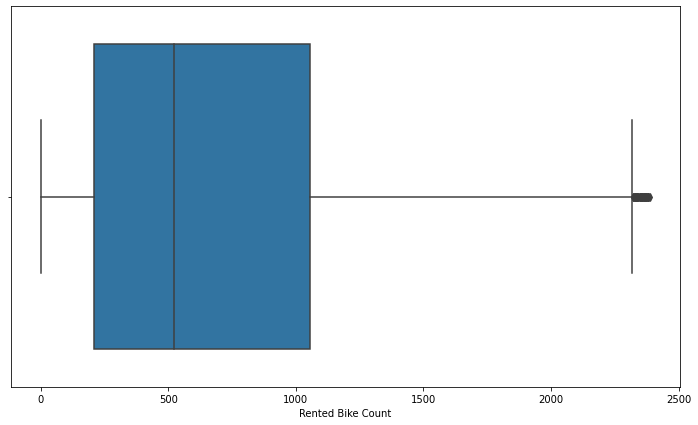

In [37]:
# dropping rows where Rented Bike Count is more than the upper bound
data = data[data["Rented Bike Count"] < upper_bound]

# Plotting to see if there are still any outliers
sns.boxplot(data["Rented Bike Count"])

<blockquote>There are few points but they are very close to the upper Bound and hence we keep those</blockquote>

<h1>Handling the Date Column</h1>
<ol>
  <li>The day of the week will be extracted to make a new column as integer values between 0 and 6 to feed into the model</li>
  <li>The month number will be extracted from the date column as an integer value to feed into the models</li>
</ol>

In [38]:
# Taking day of the week as an ordinal feature to see how the day of the week influences bike rentals

data["Day of Week"] = data["Date"].apply(lambda x : x.weekday())
data.head()

# Year doesnt seem relevant as there are only 2 years in the whole dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0,0,Winter,No Holiday,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0,0,Winter,No Holiday,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0,0,Winter,No Holiday,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0,0,Winter,No Holiday,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0,0,Winter,No Holiday,3


In [39]:
# Converting dates to useful features.
# 1. Taking the month of the year as an integer from the date column
data["Month"] = data["Date"].apply(lambda x : x.month)
data.drop("Date", axis=1, inplace=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Month
0,254,0,-5.2,37,2.2,2000,0.0,0,0,Winter,No Holiday,3,1
1,204,1,-5.5,38,0.8,2000,0.0,0,0,Winter,No Holiday,3,1
2,173,2,-6.0,39,1.0,2000,0.0,0,0,Winter,No Holiday,3,1
3,107,3,-6.2,40,0.9,2000,0.0,0,0,Winter,No Holiday,3,1
4,78,4,-6.0,36,2.3,2000,0.0,0,0,Winter,No Holiday,3,1


<blockquote>Finally encoding the Seasons and Holiday</blockquote>

In [40]:
# Encoding Holiday and Seasons to discrete integers
enc = OrdinalEncoder()
enc.fit(data[["Holiday","Seasons"]])
data[["Holiday", "Seasons"]] = enc.transform(data[["Holiday","Seasons"]])

In [41]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Month
0,254,0,-5.2,37,2.2,2000,0.0,0,0,3.0,1.0,3,1
1,204,1,-5.5,38,0.8,2000,0.0,0,0,3.0,1.0,3,1
2,173,2,-6.0,39,1.0,2000,0.0,0,0,3.0,1.0,3,1
3,107,3,-6.2,40,0.9,2000,0.0,0,0,3.0,1.0,3,1
4,78,4,-6.0,36,2.3,2000,0.0,0,0,3.0,1.0,3,1


<blockquote>Now our data </blockquote>

In [43]:
# Fitting and Testing a Baseline Model without any preprocessing of the data
# Building the first simple model
lr_model = LinearRegression()
X = data[[col for col in data.columns if col!= "Rented Bike Count"]]
y = data[["Rented Bike Count"]]

In [44]:
# Splitting the Data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [45]:
# Fitting the Data
lr_model.fit(x_train,y_train)

LinearRegression()

In [49]:
# Storing predictions in an array
predictions_lr_model = lr_model.predict(x_train)

In [47]:
# Checking the R squared score of the Model
lr_model.score(x_test, y_test)

0.5620919357743572

In [48]:
# Transforming the target variable to eliminate the skewness in the data
data["Rented Bike Count"] = np.sqrt(data["Rented Bike Count"])

In [54]:
X = data[[col for col in data.columns if col!= "Rented Bike Count"]]
y = data[["Rented Bike Count"]]

In [55]:
# Splitting the Data again

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [56]:
# Fitting the Data
lr_model.fit(x_train,y_train)

LinearRegression()

In [57]:
# Storing predictions in an array
predictions_lr_model = lr_model.predict(x_train)

In [58]:
# Checking the R squared score of the Model
lr_model.score(x_test, y_test)

0.6362206599520004

In [61]:
# Checking metrics for linear model
predictions_lr_model_test = lr_model.predict(x_test)
predictions_lr_model_train = lr_model.predict(x_train)

In [67]:
# Checking Metrics on Training set
print(f"Mean Absolute Error : {mean_absolute_error(predictions_lr_model_train, y_train)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_lr_model_train, y_train)}")
print(f"R squared score : {lr_model.score(x_train, y_train)}")

print("__"*30 + "\n")

# Checking Metrics on Test Set
print(f"Mean Absolute Error : {mean_absolute_error(predictions_lr_model_test, y_test)}")
print(f"Mean Squared Error : {mean_squared_error(predictions_lr_model_test, y_test)}")
print(f"R squared score : {lr_model.score(x_test, y_test)}")

Mean Absolute Error : 5.123584920004611
Mean Squared Error : 44.47451925654642
R squared score : 0.6545103377327548
____________________________________________________________

Mean Absolute Error : 5.297609599437058
Mean Squared Error : 46.786017968676695
R squared score : 0.6362206599520004
